In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
lc = "./scp/r6_200/"

In [2]:
# wd = pd.read_csv("./wandb_data.csv")
# sns.lineplot(x="Step" , y="scp - train/loss" , data = wd.iloc[:500]).set(xlabel="Iteration Count" , ylabel="Train Loss" , title="Training Loss")

[Text(0.5, 0, 'Step Number'),
 Text(0, 0.5, 'Number of epochs'),
 Text(0.5, 1.0, 'Epochs vs Iteration graph')]

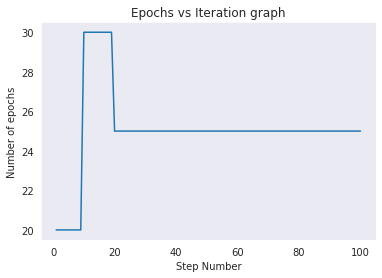

In [3]:
def epoch_ct(): 
    ct = 0
    while True:
        ct += 1
        if ct < 10:
            yield 20
        elif ct < 20:
            yield 30
        # elif ct < 60:
        #     yield 50
        else:
            yield 25

ep = epoch_ct()
eps = []
for i in range(100):
    eps.append(next(ep))

sns.lineplot(x=range(1,101) , y=eps).set(xlabel="Step Number", ylabel="Number of epochs" , title="Epochs vs Iteration graph")

In [7]:
def get_flows(lc):
    # lc = "./scp/r2"
    # lc = "./dijk"
    loc = lc + "/flowsOut/"
    rpts = os.listdir(loc)
    flws = []

    for i in rpts:
        fls = os.listdir(loc + i)
        flws_i = []
        fls.sort()
        fls.sort(key=lambda x : int(x[5:]))
        
        for j in fls:
            flws_j = []
            flsO = os.listdir(loc + f"{i}/{j}")
            flsO.sort()

            for k in flsO:
                f = open(loc + f"{i}/{j}/{k}" , 'r')
                ar = [ float(x) for x in f.readline().split(",")[7:] ]
                if ar == []:
                    print(loc + f"{i}/{j}/{k}")
                    dts , bws , jts , los , tos = 0, 0 , 0 , 0 ,0 
                else:
                    dts , bws , jts , los , tos = ar[0] , ar[1] , ar[2] , ar[3] , ar[4] 
                    
                f.close()
                flws_j.append([ dts , bws , jts , los , tos ])
            
            flws_i.append(flws_j)
        flws.append(flws_i)

    flws = np.array(flws)
    print(flws.shape)
    return flws


In [8]:
dij_flows = get_flows("./dijk/")
r2_flows = get_flows(lc)

(1, 20, 3, 5)
./scp/r6_200//flowsOut/9/flows9/flow_001.txt
./scp/r6_200//flowsOut/9/flows18/flow_001.txt
./scp/r6_200//flowsOut/23/flows1/flow_001.txt
./scp/r6_200//flowsOut/10/flows5/flow_001.txt
./scp/r6_200//flowsOut/10/flows12/flow_001.txt
./scp/r6_200//flowsOut/5/flows9/flow_002.txt
./scp/r6_200//flowsOut/5/flows15/flow_002.txt
./scp/r6_200//flowsOut/8/flows2/flow_001.txt
./scp/r6_200//flowsOut/3/flows1/flow_001.txt
./scp/r6_200//flowsOut/20/flows12/flow_002.txt
./scp/r6_200//flowsOut/1/flows9/flow_001.txt
./scp/r6_200//flowsOut/7/flows19/flow_002.txt
./scp/r6_200//flowsOut/2/flows14/flow_000.txt
./scp/r6_200//flowsOut/16/flows13/flow_002.txt
./scp/r6_200//flowsOut/16/flows17/flow_001.txt
./scp/r6_200//flowsOut/16/flows18/flow_002.txt
./scp/r6_200//flowsOut/11/flows17/flow_001.txt
./scp/r6_200//flowsOut/12/flows6/flow_002.txt
./scp/r6_200//flowsOut/12/flows10/flow_002.txt
./scp/r6_200//flowsOut/29/flows13/flow_002.txt
./scp/r6_200//flowsOut/6/flows14/flow_000.txt
(31, 20, 3, 5)


In [9]:
fls = []
for i in os.listdir("/home/manoj/sdn/onos-apps/topo/flows"):
    f = open(f"/home/manoj/sdn/onos-apps/topo/flows/{i}")
    bf = []
    # print(f"./flows/{i}")
    for i in f.readlines():
        # print(i)
        ar = [ int(x) for x in i.split(",") ]
        bf.append(ar)
    fls.append(bf)
fls = np.array(fls)
fls.shape

(20, 3, 6)

In [10]:
import seaborn as sns
# sns.set(rc={'figure.figsize':(20,8)})

In [12]:
rpt_id = 30
val_id = 1

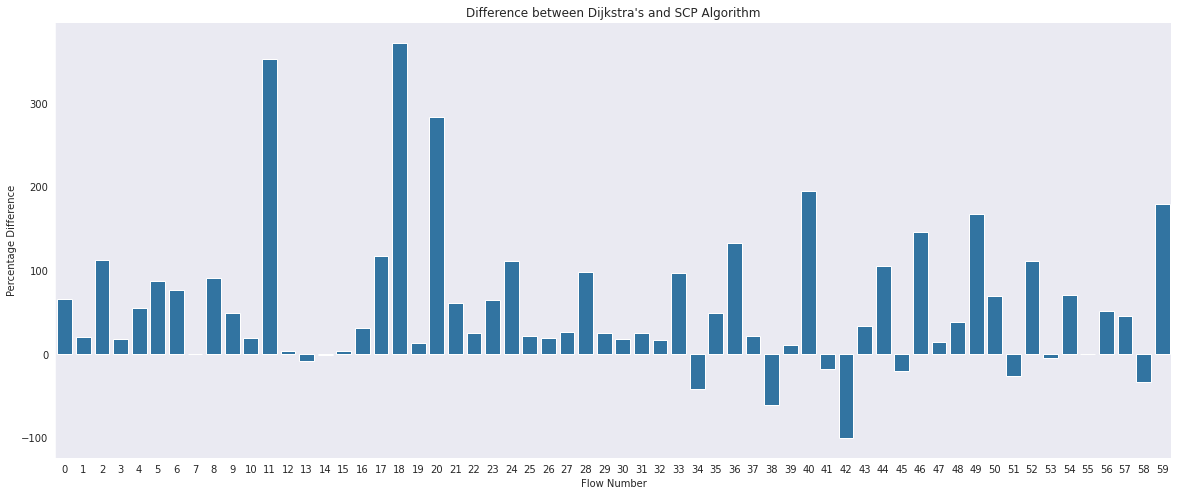

In [13]:
# sns.barplot()
df_dr= {
    "Flow Number" : range(60),
    "SCP algorithm" : r2_flows[rpt_id,:,:,val_id].flatten(), 
    "Dijkstras" : dij_flows[0,:,:,val_id].flatten() ,
    "Bandwidth" : fls[:,:,3].flatten() * 1000000
    }
f, ax = plt.subplots(figsize=(20, 8))
df_dr= pd.DataFrame(df_dr)
df_dr["Percentage Difference"] = ((df_dr["SCP algorithm"] - df_dr["Dijkstras"] )/ df_dr["Dijkstras"] )* 100
sns.barplot( y="Percentage Difference", x="Flow Number", data=df_dr, color=sns.color_palette()[0] ).set(title="Difference between Dijkstra's and SCP Algorithm")
sns.despine(bottom = False, left = False)

<AxesSubplot:xlabel='Flow Number', ylabel='Bandwidth'>

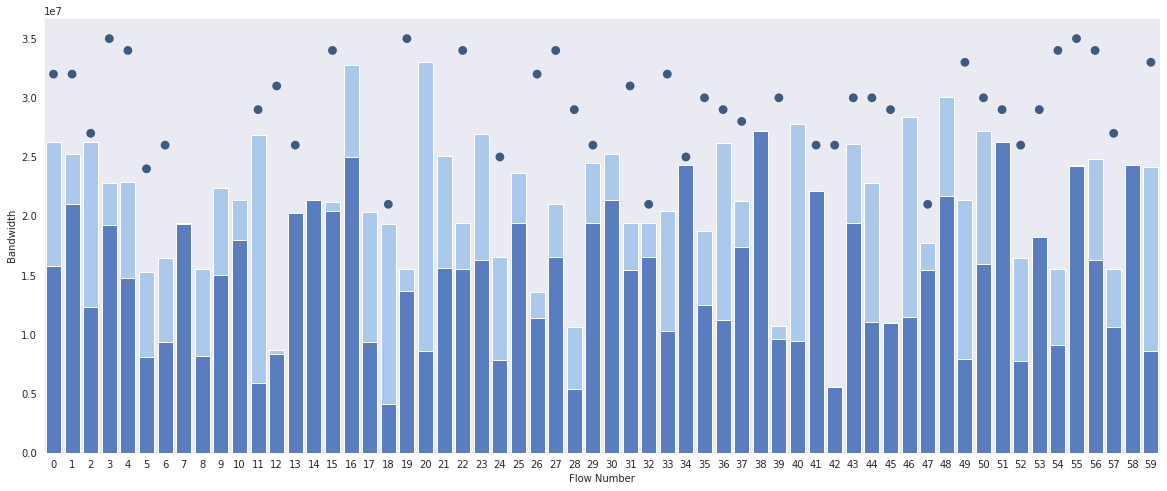

In [14]:
f, ax = plt.subplots(figsize=(20, 8))

sns.set_color_codes("pastel")
sns.barplot( y="SCP algorithm", x="Flow Number" , data=df_dr ,color="b" , label="SCP Algorithm")
sns.set_color_codes("muted")
sns.barplot( y="Dijkstras", x="Flow Number" , data=df_dr ,color="b" , label="Dijkstras" )
sns.pointplot(y="Bandwidth" , x="Flow Number" , data=df_dr , linestyles='' , color="#3d5a80" , label="Requested Bandwidth")

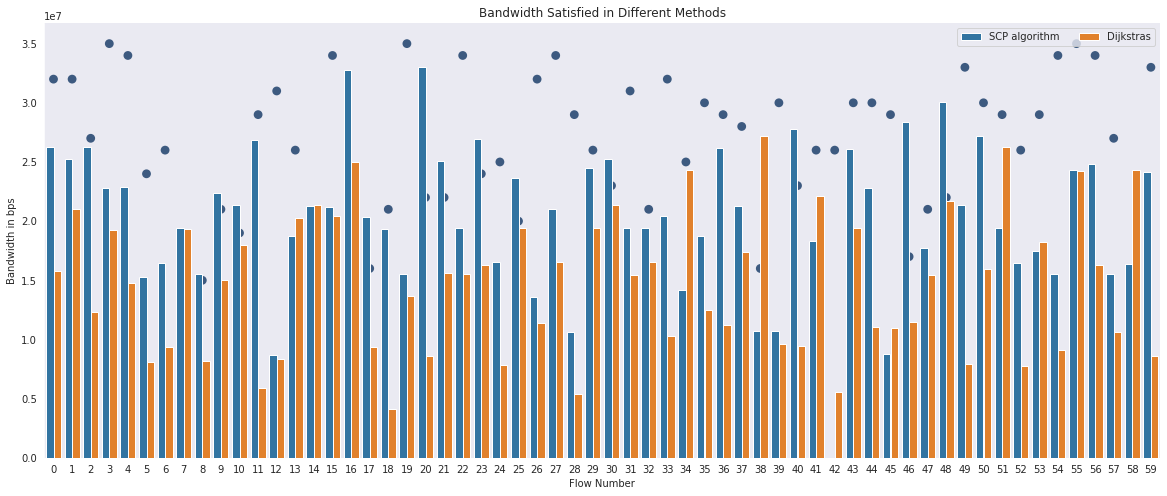

In [15]:
f, ax = plt.subplots(figsize=(20, 8))

df_dr2 = pd.melt(df_dr, id_vars = ["Flow Number", "Percentage Difference" , "Bandwidth"] , var_name="method" , value_name="Bandwidth (mbps)")

sns.barplot( y="Bandwidth (mbps)", x="Flow Number" , hue="method", data=df_dr2  )
sns.pointplot(y="Bandwidth" , x="Flow Number" , data=df_dr , linestyles='' , color="#3d5a80" , label="Requested Bandwidth")
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Bandwidth in bps",
       xlabel="Flow Number" , title="Bandwidth Satisfied in Different Methods", )

sns.despine(bottom = False, left = False)

<AxesSubplot:xlabel='Flow Number', ylabel='Jitter (ms)'>

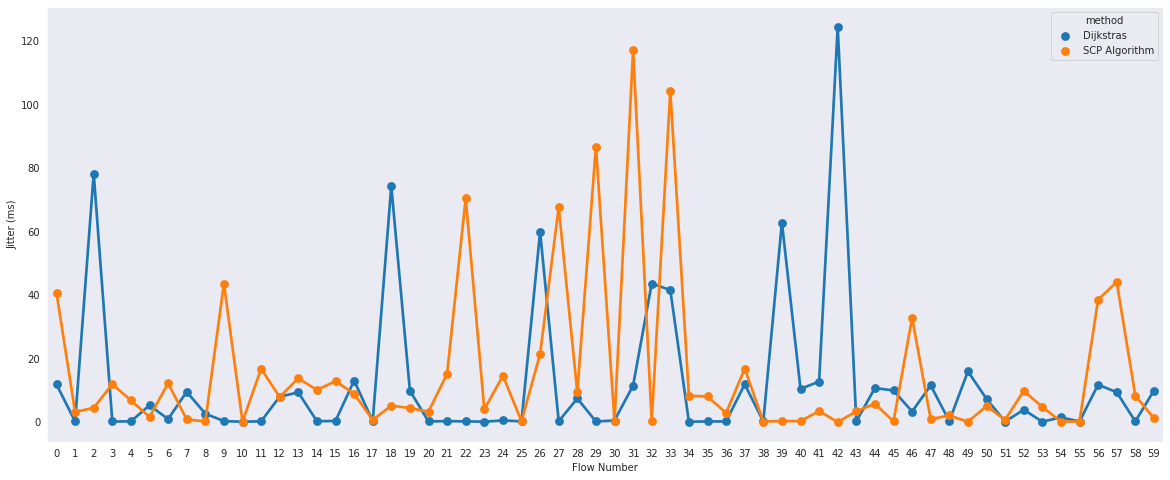

In [16]:
df_jt= {
    "Flow Number" : range(60),
    "Dijkstras" : dij_flows[0,:,:,2].flatten() , 
    "SCP Algorithm" :  r2_flows[rpt_id,:,:,2].flatten(),
}
f, ax = plt.subplots(figsize=(20, 8))

df_jt = pd.DataFrame(df_jt)
df_jt2 =  pd.melt(df_jt, id_vars = ["Flow Number"] , var_name="method" , value_name="Jitter (ms)")

sns.pointplot(y="Jitter (ms)" , x="Flow Number" , data = df_jt2 , hue="method" , markers="o") 

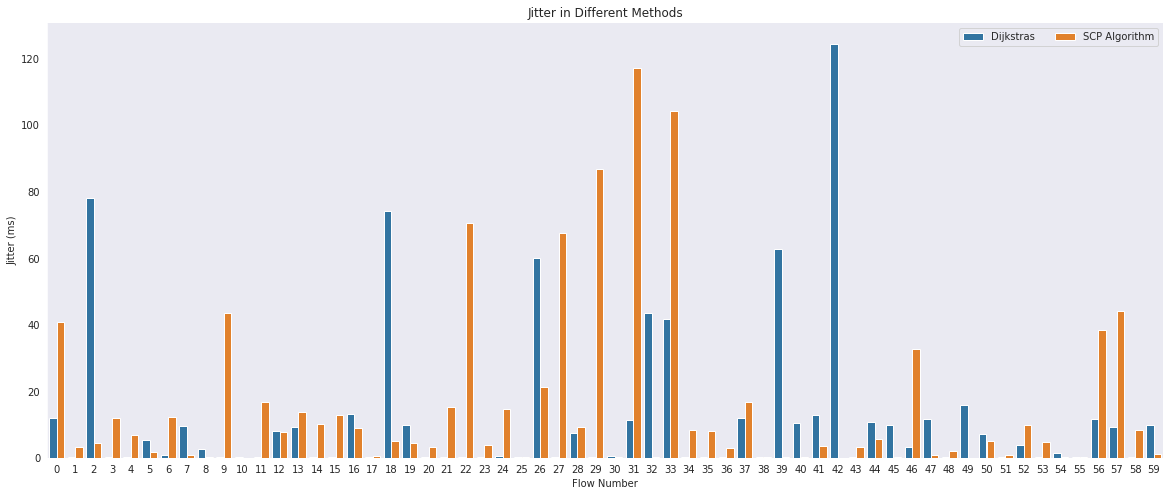

In [17]:
f, ax = plt.subplots(figsize=(20, 8))
sns.barplot(y="Jitter (ms)" , x="Flow Number" , data = df_jt2 , hue="method") 

legend = ax.legend(ncol=2, loc="upper right", frameon=True)

ax.set(title="Jitter in Different Methods" )
sns.despine(bottom = False, left = False)

/home/manoj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


<AxesSubplot:xlabel='Flow Number', ylabel='Packet Loss (%)'>

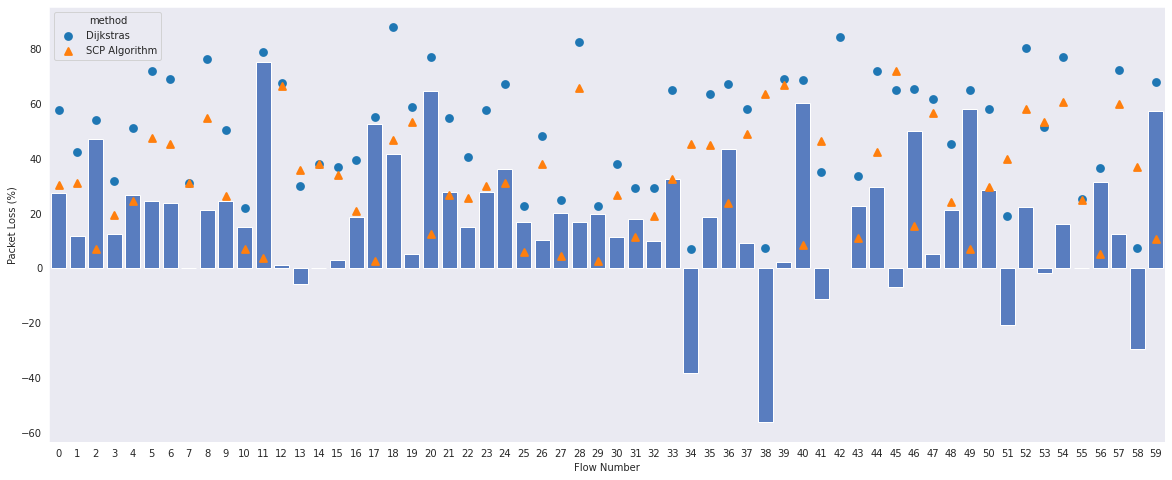

In [18]:
df_pr= {
    "Flow Number" : range(60),
    "Dijkstras" :( dij_flows[0,:,:,3].flatten() / dij_flows[0,:,:,4].flatten() )* 100 , 
    "SCP Algorithm" : ( r2_flows[rpt_id,:,:,3].flatten() / r2_flows[rpt_id,:,:,4].flatten() )* 100,
}
f, ax = plt.subplots(figsize=(20, 8))

df_pr = pd.DataFrame(df_pr)
df_pr2 =  pd.melt(df_pr, id_vars = ["Flow Number"] , var_name="method" , value_name="Packet Loss (%)")


sns.set_color_codes("muted")
df_pr["Difference"] = df_pr["Dijkstras"] - df_pr["SCP Algorithm"]

sns.barplot(x="Flow Number" , y="Difference" , data=df_pr , color='b')
sns.set_color_codes("muted")
sns.pointplot(y="Packet Loss (%)" , x="Flow Number" , data = df_pr2 , hue="method" , markers=[ "o" , "^"] , linestyles="") 

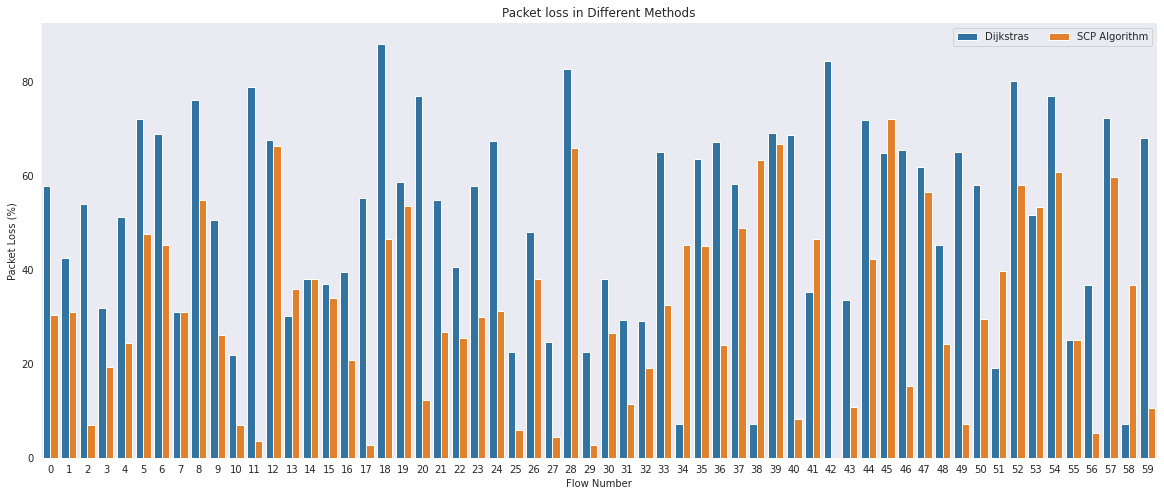

In [19]:
f, ax = plt.subplots(figsize=(20, 8))

sns.barplot(x="Flow Number" , y="Packet Loss (%)" , data=df_pr2 , hue="method")

legend = ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(title="Packet loss in Different Methods" )
sns.despine(bottom = False, left = False)

[Text(0, 0.5, 'Bandwidht (bps)'), Text(0.5, 0, '')]

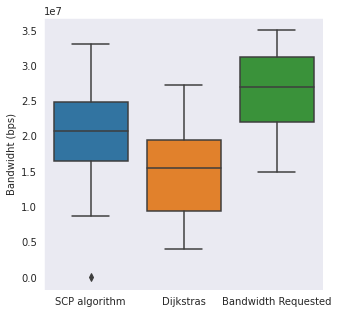

In [20]:
sns.set_style("dark")
df_dr3 = pd.melt(df_dr, id_vars = ["Flow Number", "Percentage Difference" ] , var_name="method" , value_name="Bandwidth (mbps)")
df_dr3["method" ] = df_dr3["method"].apply(lambda x : "Bandwidth Requested" if x == "Bandwidth" else x )
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x="method" , y="Bandwidth (mbps)" , data=df_dr3 ).set(ylabel="Bandwidht (bps)" , xlabel="")

In [21]:
sp_file = open( lc + "splitting.txt" , 'r')

t_seq = []
t_buf = []

sp_data = []
b_data = []
n_flows = 3

bf_data = [[] for x in range(n_flows)]
ct = 1
ct_b = 0
for i in sp_file.readlines():
    if i[0] == "A":
        dt = i.split(":")[1]
        reqId = int(dt[1])
        # print(reqId)
        pth = [ int(x) for x in dt[4:dt.index("]")].split(',') ]
        bw = float(i.split(" ")[-1])
        bf_data[reqId].append( [pth , bw] )
        # print(bf_data)
    elif i[0] == "D":
        ct += 1
        ct_b += 1

        t_buf.append(i.split(" ")[1].strip())
        b_data.append(bf_data)

        if ct_b % 20 == 0:
            sp_data.append(b_data)
            b_data = []

        if ct % 20 == 0:
            t_seq.append(t_buf)
            t_buf = []

        bf_data = [[] for x in range(n_flows)]
    
    elif i[0] == "S":
        t_buf.append( i.split(" ")[1].strip() )

t_seq = np.array(t_seq)
t_seq = np.expand_dims(t_seq, 2)
t_seq = np.repeat(t_seq, 3, axis=2)
t_seq.shape

(22, 20, 3)

In [22]:
seq_l = t_seq.shape[0]
rpt = np.array(range(seq_l))
rpt = np.expand_dims(rpt, axis=[1,2])
rpt = np.repeat( np.repeat(rpt, 20, axis=1) , 3 , axis=2 )

In [23]:
seq = np.array(range(20))
seq = np.expand_dims(seq, axis=[0,2])
seq = np.repeat( np.repeat(seq, 3, axis=2) , seq_l , axis=0 )

In [26]:
fid = np.array(range(60))
fid = np.expand_dims(fid, axis=[0])
fid = np.repeat(fid, rpt_id, axis=0)

In [27]:
val_id , r2_flows[:,:,:,val_id].shape ,t_seq.shape, rpt.shape , seq.shape, fid.shape

(1, (31, 20, 3), (22, 20, 3), (22, 20, 3), (22, 20, 3), (30, 60))

rpt, flowid, seq

In [28]:
rpt_id = 22

In [29]:
df_rp = {
    "Bandwidth (bps)" : r2_flows[:rpt_id,:,:,val_id].flatten() , 
    "Jitter (ms)" : r2_flows[:rpt_id,:,:,2].flatten() , 
    "Packet Loss (%)" : (r2_flows[:rpt_id,:,:,3].flatten() / r2_flows[:rpt_id,:,:,4].flatten() )*100 , 
    "Repeat ID" : rpt[:rpt_id].flatten(),
    "Sequence ID" : seq[:rpt_id].flatten(),
    "Flow ID" : fid[:rpt_id].flatten(),
    "Flow Number" : t_seq[:rpt_id].flatten()
}
df_rp = pd.DataFrame(df_rp)
df_rp["FL-SQ"] = df_rp["Flow ID"].apply(str) + "-" +  df_rp["Sequence ID"].apply(str)
df_rp["Time"] = pd.to_datetime(df_rp["Flow Number"]).dt.strftime('%H:%M')
df_rp.head()

/home/manoj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


,Bandwidth (bps),Jitter (ms),Packet Loss (%),Repeat ID,Sequence ID,Flow ID,Flow Number,FL-SQ,Time
0,25269504.0,49.277,32.921422,0,0,0,2023-06-08T22:54:30.342418,0-0,22:54
1,24352126.0,0.276,33.396955,0,0,1,2023-06-08T22:54:30.342418,1-0,22:54
2,27468228.0,83.604,2.981069,0,0,2,2023-06-08T22:54:30.342418,2-0,22:54
3,20508690.0,98.354,27.216867,0,1,3,2023-06-08T22:56:46.256940,3-1,22:56
4,23551771.0,4.937,22.127856,0,1,4,2023-06-08T22:56:46.256940,4-1,22:56


In [30]:
dij_flows.shape

(1, 20, 3, 5)

In [31]:
df_dj = {
    "Sequence ID" : seq[0].flatten(),   
    "Flow ID" : fid[0].flatten(),
    "Bandwidth (bps)" : dij_flows[:,:,:,val_id].flatten() , 
    "Jitter (ms)" : dij_flows[:,:,:,2].flatten() , 
    "Packet Loss (%)" : (dij_flows[:,:,:,3].flatten() / dij_flows[:,:,:,4].flatten() )*100 , 
}
df_dj = pd.DataFrame(df_dj)
df_dj.head()
ar = np.array([ x % len(df_dj)  for x in range(rpt_id*len(df_dj)) ])
df_dj = df_dj.iloc[ar]
df_dj["Time"] = np.array(df_rp["Time"])
df_dj["Repeat ID"] = np.array(df_rp["Repeat ID"])
df_dj.head()

,Sequence ID,Flow ID,Bandwidth (bps),Jitter (ms),Packet Loss (%),Time,Repeat ID
0,0,0,15823257.0,11.846,57.822592,22:54,0
1,0,1,21000267.0,0.202,42.554229,22:54,0
2,0,2,12356933.0,78.257,54.078926,22:54,0
3,1,3,19239882.0,0.173,31.927754,22:56,0
4,1,4,14771990.0,0.212,51.215195,22:56,0


In [32]:
df_rp["Repeat Id"] = df_rp["Repeat ID"] + 1
df_dj["Repeat Id"] = df_dj["Repeat ID"] + 1

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_rp.groupby("Repeat ID").mean()

,Bandwidth (bps),Jitter (ms),Packet Loss (%),Sequence ID,Flow ID,Repeat Id
Repeat ID,,,,,,
0,21231055.92,13.93,31.11,9.50,29.50,1.00
1,21880021.98,17.00,28.65,9.50,29.50,2.00
2,20115280.22,16.29,34.99,9.50,29.50,3.00
3,21755951.18,14.60,27.19,9.50,29.50,4.00
4,20747023.05,18.75,31.47,9.50,29.50,5.00
5,21560590.82,12.00,29.88,9.50,29.50,6.00
6,21442239.93,13.37,27.06,9.50,29.50,7.00
7,19898842.50,17.91,33.04,9.50,29.50,8.00
8,21167707.45,18.36,30.26,9.50,29.50,9.00


<AxesSubplot:xlabel='Repeat Id', ylabel='Bandwidth (bps)'>

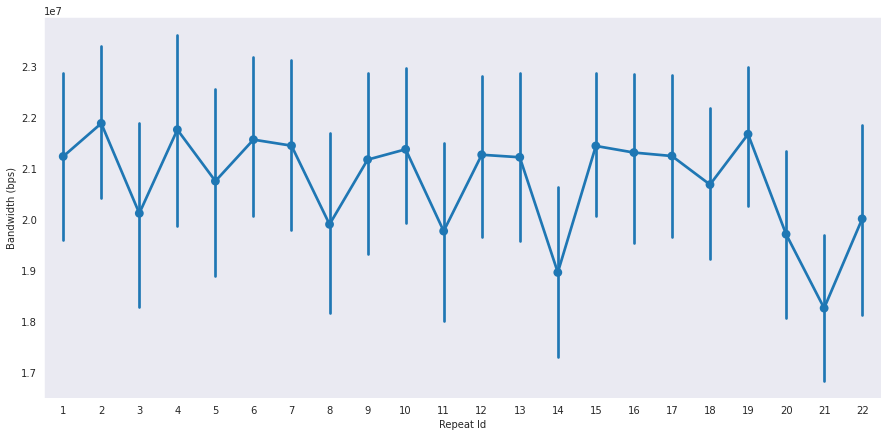

In [33]:
f, ax = plt.subplots(figsize=(15, 7))
sns.pointplot(x="Repeat Id" , y="Bandwidth (bps)" , data=df_rp )

<AxesSubplot:xlabel='Repeat ID', ylabel='Jitter (ms)'>

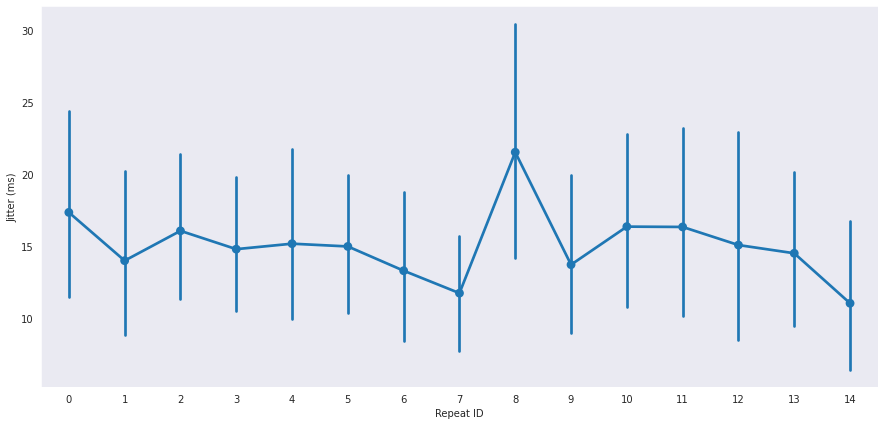

In [101]:
f, ax = plt.subplots(figsize=(15, 7))
sns.pointplot(x="Repeat Id" , y="Jitter (ms)" , data=df_rp )

<AxesSubplot:xlabel='Repeat ID', ylabel='Packet Loss (%)'>

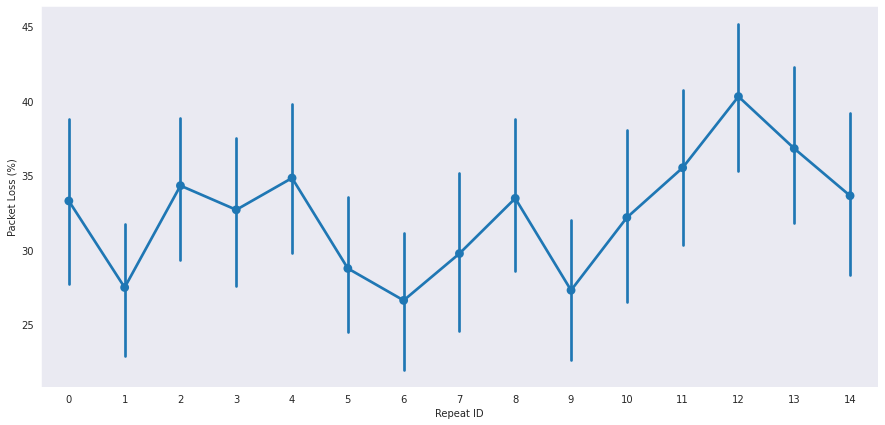

In [102]:
f, ax = plt.subplots(figsize=(15, 7))
sns.pointplot(x="Repeat Id" , y="Packet Loss (%)" , data=df_rp )

[(0.0, 50000000.0)]

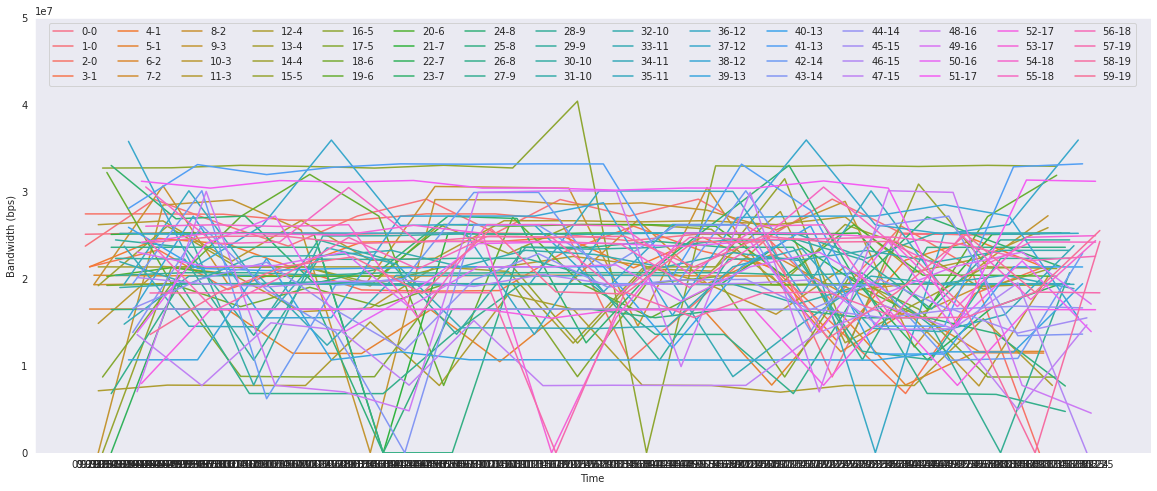

In [103]:
f, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(y="Bandwidth (bps)", x="Time" , hue="FL-SQ" , data=df_rp )
legend = ax.legend(ncol=15, loc="upper center", frameon=True)
ax.set(ylim=(0,50000000))

<AxesSubplot:xlabel='Time', ylabel='Bandwidth (bps)'>

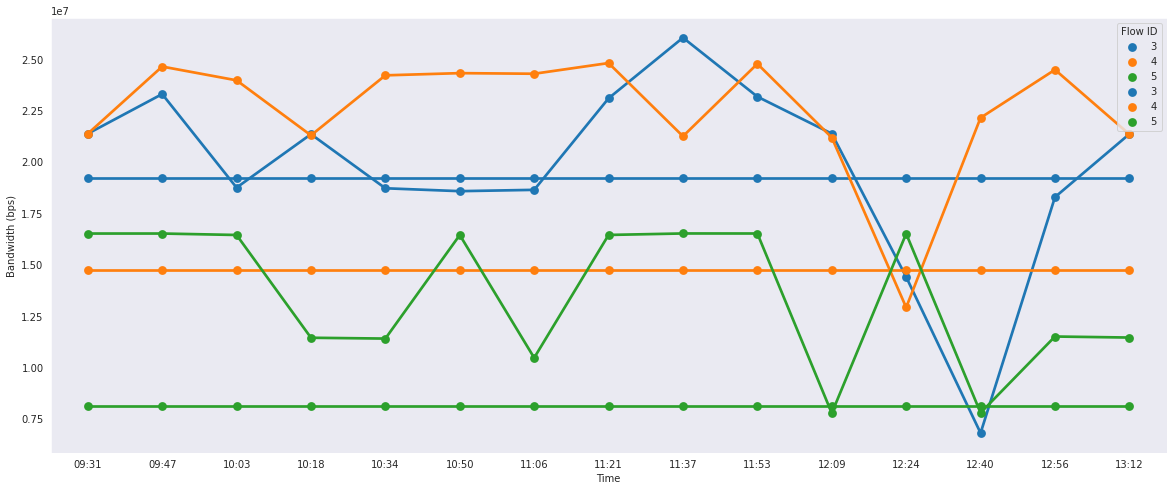

In [104]:
seq_id = 1
f, ax = plt.subplots(figsize=(20, 8))
sns.pointplot(y="Bandwidth (bps)" , x="Repeat Id" , data=df_rp[df_rp["Sequence ID"] == seq_id  ] , hue= "Flow ID")
sns.pointplot(y="Bandwidth (bps)" , x="Repeat Id" , data=df_dj[df_dj["Sequence ID"] == seq_id  ] , hue= "Flow ID")

In [105]:
sns.color_palette()[1]

(1.0, 0.4980392156862745, 0.054901960784313725)

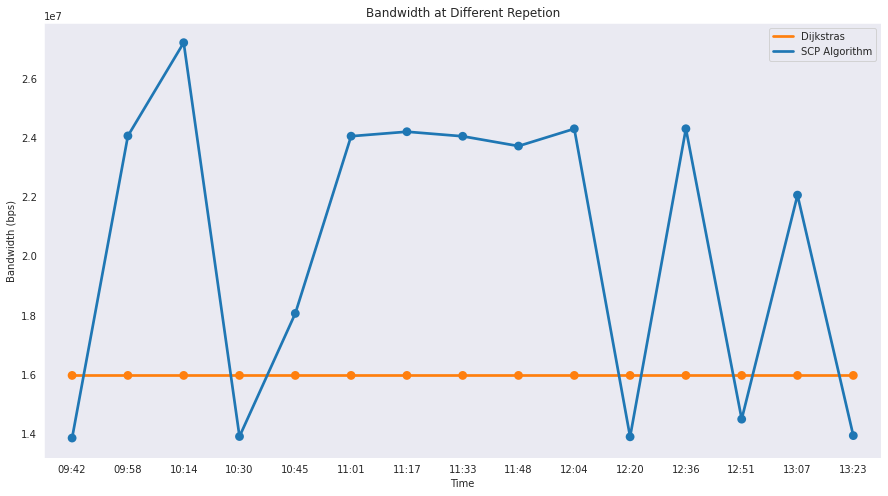

In [106]:
fl_id = 50
import matplotlib.dates as md
f, ax = plt.subplots(figsize=(15, 8))

sns.pointplot(y="Bandwidth (bps)" , x="Repeat Id" , data=df_dj[df_dj["Flow ID"] == fl_id] , ax=ax, label="Dijkstras" , color=sns.color_palette()[1])
sns.pointplot(y="Bandwidth (bps)" , x="Repeat Id" , data=df_rp[df_rp["Flow ID"] == fl_id] , ax=ax, label="SCP Algorithm").set(title="Bandwidth at Different Repetion" )
ax.legend(handles=[ax.lines[0] ,ax.lines[-1]] , labels=["Dijkstras","SCP Algorithm"] , )

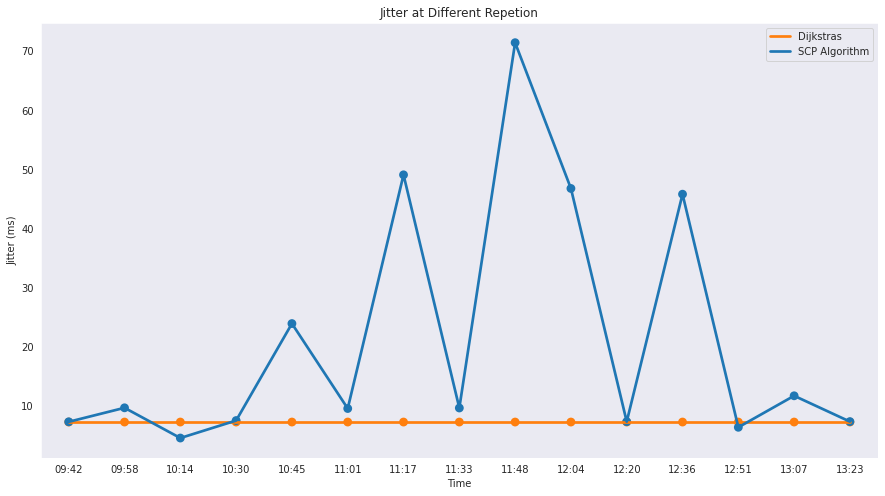

In [107]:
f, ax = plt.subplots(figsize=(15, 8))

sns.pointplot(y="Jitter (ms)" , x="Repeat Id" , data=df_dj[df_dj["Flow ID"] == fl_id] , ax=ax, label="Dijkstras" , color=sns.color_palette()[1])
sns.pointplot(y="Jitter (ms)" , x="Repeat Id" , data=df_rp[df_rp["Flow ID"] == fl_id] , ax=ax, label="SCP Algorithm").set(title="Jitter at Different Repetion" )
ax.legend(handles=[ax.lines[0] ,ax.lines[-1]] , labels=["Dijkstras","SCP Algorithm"] , )

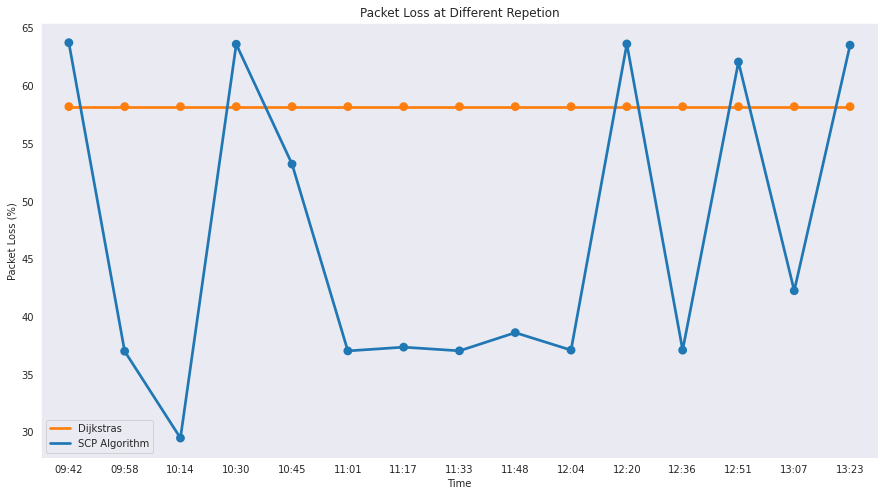

In [108]:
f, ax = plt.subplots(figsize=(15, 8))


sns.pointplot(y="Packet Loss (%)" , x="Repeat Id" , data=df_dj[df_dj["Flow ID"] == fl_id] , ax=ax, label="Dijkstras" , color=sns.color_palette()[1])
sns.pointplot(y="Packet Loss (%)" , x="Repeat Id" , data=df_rp[df_rp["Flow ID"] == fl_id] , ax=ax, label="SCP Algorithm").set(title="Packet Loss at Different Repetion" )
ax.legend(handles=[ax.lines[0] ,ax.lines[-1]] , labels=["Dijkstras","SCP Algorithm"] , )

In [109]:
for i in range(6):
    print( fls[:,:,i].flatten()[50] , end="," )
print(fls[16,2])

17,18,36,30,3,1,[17 18 36 30  3  1]


In [110]:
sp_data[0][16][2][0]

[[5, 1], 21.0]

In [111]:
for i in range(seq_l):
    ar1 = [ str(x+1) for x in [3] + sp_data[i][16][2][0][0] ]
    ar2 = [ str(x+1) for x in [3] + sp_data[i][16][2][1][0] ]
    print( " ".join(ar1) , sp_data[i][16][2][0][1] , " ".join(ar2), sp_data[i][16][2][1][1]   , sep=",")

4 6 2,21.0,4 5 6 2,0.0
4 6 5 2,13.0,4 6 2,14.0
4 6 2,21.0,4 6 5 2,6.0
4 6 5 2,13.0,4 6 2,14.0
4 2,7.0,4 5 6 2,15.0
4 6 5 2,13.0,4 6 2,14.0
4 6 2,21.0,4 6 5 2,6.0
4 6 2,21.0,4 6 5 2,6.0
4 6 2,21.0,4 6 5 2,6.0
4 5 6 2,15.0,4 6 2,6.0
4 5 6 2,15.0,4 6 2,6.0
4 6 2,21.0,4 5 6 2,0.0
4 6 2,21.0,4 6 5 2,6.0
4 6 2,21.0,4 6 5 2,6.0
4 6 2,21.0,4 6 5 2,6.0
4 6 5 2,13.0,4 6 2,14.0
